**IMPORT LIBRARIES**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**PROBLEM STATEMENT**
- Understanding the sales in the 2 years.

1.Total sales overall,monthly,yearly,quartery,weekly,per region,per country,per team,per sales person,per category,per product type
  
2.Top performing team,sales person,country,region,product type,category

3.Performance trends

**LOAD DATA**

In [35]:
df=pd.read_csv("sales project.csv")

In [37]:
df.head(5)

,Sales Person,Team,Country,Region,Product Type,Category,Cost per box,Date,Week,Month,Quarter,Year,Amount,Boxes,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Dennison Crosswaite,Yummies,UK,Europe,Almond Choco,Bars,$5.15,01/01/2021,Wk1,Jan,Q1,2021,"$2,037.00",422,NaN,NaN,NaN,NaN,NaN
1,Kelci Walkden,Jucies,India,APAC,Almond Choco,Bars,$5.15,01/01/2021,Wk1,Jan,Q1,2021,"$6,160.00",126,NaN,NaN,NaN,NaN,NaN
2,Gigi Bohling,Yummies,Canada,Toronto,Caramel Stuffed Bars,Bars,$8.43,01/01/2021,Wk1,Jan,Q1,2021,"$1,442.00",200,NaN,NaN,NaN,NaN,NaN
3,Madelene Upcott,Jucies,India,APAC,Eclairs,Bites,$6.31,01/01/2021,Wk1,Jan,Q1,2021,"$6,979.00",252,NaN,NaN,NaN,NaN,NaN
4,Oby Sorrel,Jucies,USA,Americas,Manuka Honey Choco,Other,$6.80,01/01/2021,Wk1,Jan,Q1,2021,$966.00,71,NaN,NaN,NaN,NaN,NaN


**DROP COLUMNS WITH NaN**

In [40]:
df.drop(columns=["Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18"],inplace=True)


**CONVERT AMOUNT TO SALES AMOUNT THEN DROP AMOUNT COLUMN**

In [43]:
df["Sales Amount"]=df["Amount"]
df.drop(columns="Amount",inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sales Person  9449 non-null   object
 1   Team          9449 non-null   object
 2   Country       9449 non-null   object
 3   Region        9449 non-null   object
 4   Product Type  9449 non-null   object
 5   Category      9449 non-null   object
 6   Cost per box  9449 non-null   object
 7   Date          9449 non-null   object
 8   Week          9449 non-null   object
 9   Month         9449 non-null   object
 10  Quarter       9449 non-null   object
 11  Year          9449 non-null   int64 
 12  Boxes         9449 non-null   int64 
 13  Sales Amount  9449 non-null   object
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


**CONVERT Dtype**

In [48]:
df["Sales_Amount"]=df["Sales Amount"].str.replace(r'[$,]',"",regex="True").astype(float)
df["Cost_per_box"]=df["Cost per box"].str.replace(r'[$,]',"",regex="True").astype(float)
df.drop(columns=["Sales Amount","Cost per box"],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales Person  9449 non-null   object 
 1   Team          9449 non-null   object 
 2   Country       9449 non-null   object 
 3   Region        9449 non-null   object 
 4   Product Type  9449 non-null   object 
 5   Category      9449 non-null   object 
 6   Date          9449 non-null   object 
 7   Week          9449 non-null   object 
 8   Month         9449 non-null   object 
 9   Quarter       9449 non-null   object 
 10  Year          9449 non-null   int64  
 11  Boxes         9449 non-null   int64  
 12  Sales_Amount  9449 non-null   float64
 13  Cost_per_box  9449 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


**TOTAL SALES**

Total sales is 46,086,887

In [51]:
total_sales=df["Sales_Amount"].sum()
print("Total Sales:",total_sales)

Total Sales: 46086887.0


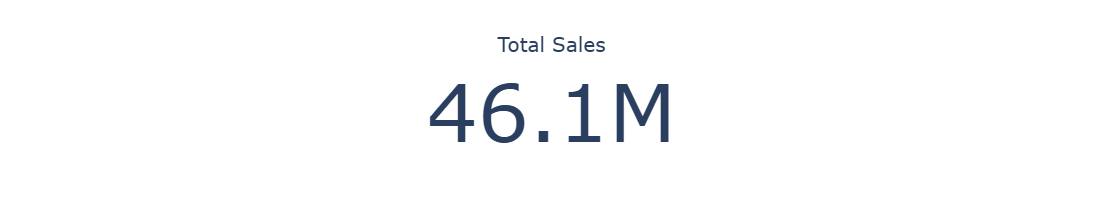

In [133]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number",
    value = total_sales,
    title = {"text": "Total Sales"}))
fig.update_layout(
    font=dict(size=18),
    width=500,  #  width size
    height=200,  # height size
    margin=dict(l=20, r=20, t=40, b=20))  # smaller margins



fig.show()


**YEARLY SALES**

In 2021, total sales is $34,868,092

In 2022, total sales is $11,218,795

So, there was a drop in sales.Why?


In [54]:
years=df["Year"].nunique()
print("Years:",years)

actual_years=df["Year"].unique()
print("Actual years:",actual_years)

yearly_sales=df.groupby("Year")["Sales_Amount"].sum()
print("Yearly sales:",yearly_sales)

Years: 2
Actual years: [2021 2022]
Yearly sales: Year
2021    34868092.0
2022    11218795.0
Name: Sales_Amount, dtype: float64


**Bar Chart**

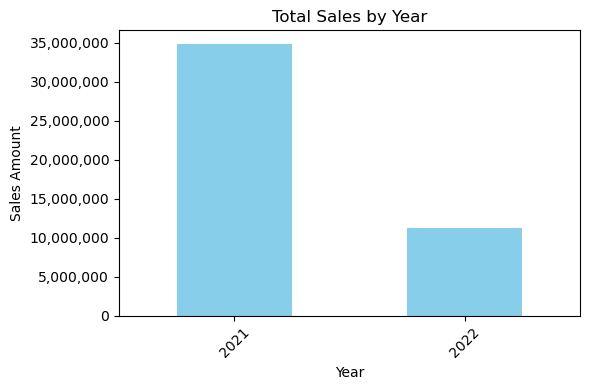

In [177]:
import matplotlib.ticker as ticker

yearly_sales.plot(kind='bar', figsize=(6, 4), color='skyblue')
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales Amount")
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Plotly Interactive Bar Chart**

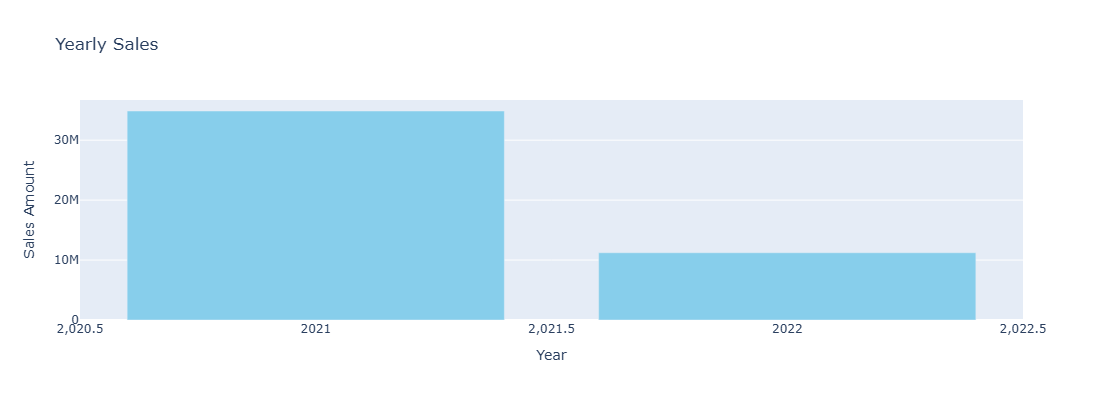

In [163]:
import plotly.express as px

fig = px.bar(
    x=yearly_sales.index,
    y=yearly_sales.values,
    labels={"x": "Year", "y": "Sales Amount"},
    title="Yearly Sales",
    color_discrete_sequence=["skyblue"]
)
fig.update_layout(width=600, height=400)
fig.show()


**QUARTERLY SALES**

In 2021, sales were in all the 4 quarters but in 2022, sales occured only in the first quarter, yet to know which months. So this explains why in 2022 sales were less than in 2021.

In 2021, Q1 had 7,491,281, in Q2 they reduced to 5,374,404, in Q3 they raised to 8,351,259, in Q4 they raised to  13,651,148.  Why did they drop in Q2 and why the increase in the 2 consecutive quarters(Q3 and Q4)?

In 2022, the sales dropped to 11,218,795 in the first quarter. Why the drop?

In [147]:
quarterly_sales=df.groupby(["Quarter","Year"])["Sales_Amount"].sum().reset_index()
print(quarterly_sales)


  Quarter  Year  Sales_Amount
0      Q1  2021     7491281.0
1      Q1  2022    11218795.0
2      Q2  2021     5374404.0
3      Q3  2021     8351259.0
4      Q4  2021    13651148.0


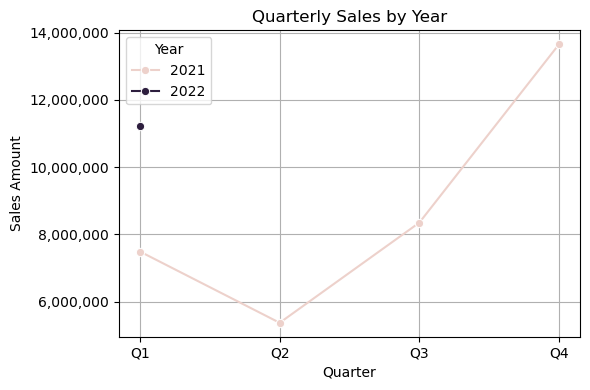

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


plt.figure(figsize=(6, 4))
sns.lineplot(data=quarterly_sales, x="Quarter", y="Sales_Amount", hue="Year", marker='o')
plt.title("Quarterly Sales by Year")
plt.ylabel("Sales Amount")
# Add comma format to Y-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(True)
plt.tight_layout()
plt.show()


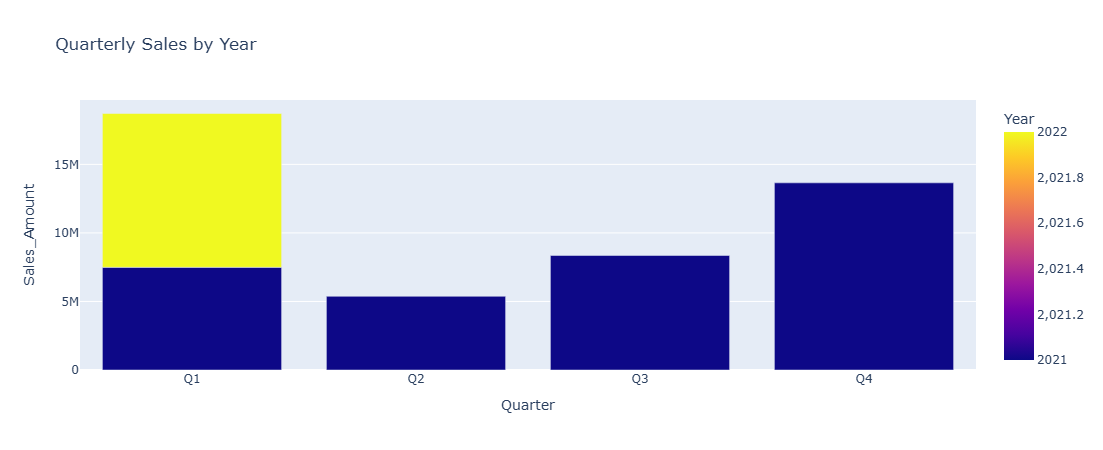

In [153]:
import plotly.express as px

fig = px.bar(
    quarterly_sales,
    x="Quarter",
    y="Sales_Amount",
    color="Year",
    barmode="group",
    title="Quarterly Sales by Year"
)
fig.update_layout(width=700, height=450)
fig.show()


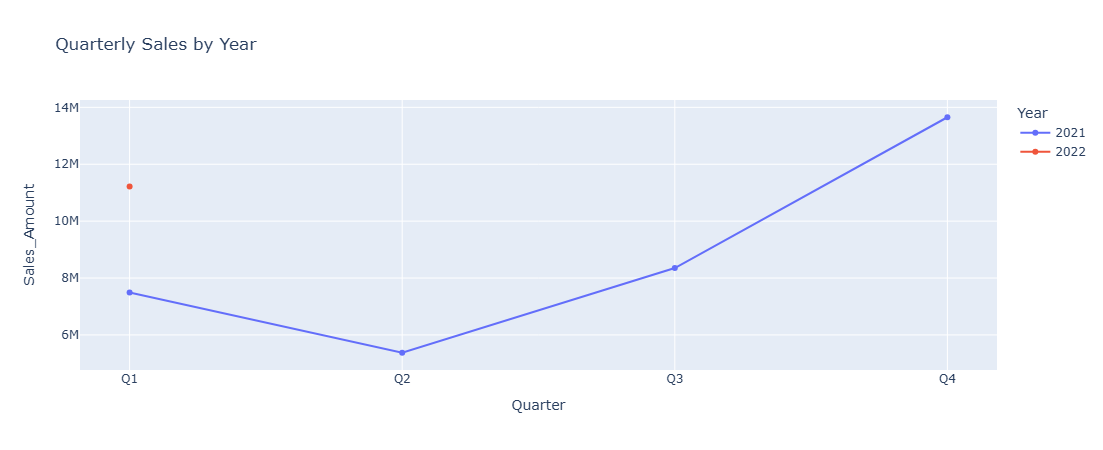

In [197]:
fig = px.line(
    quarterly_sales,
    x="Quarter",
    y="Sales_Amount",
    markers=True,
    color="Year",
    title="Quarterly Sales by Year"
)
fig.update_layout(width=700, height=450)
fig.show()


**MONTHLY SALES**

There is high sales from October 2021 to February 2022.

The sales seems to drop from March 2021 to May 2021. Slowly rises from June 2021 to August 2021 but drops slightly in September before rising in october to January the following year. 



In [300]:
monthly_sales=df.groupby(["Year","Month"])["Sales_Amount"].sum()
monthly_sales = monthly_sales.reset_index()
print(monthly_sales)
#monthly_sales.plot()

    Year Month  Sales_Amount
0   2021   Apr     2736545.0
1   2021   Aug     3144253.0
2   2021   Dec     4526641.0
3   2021   Feb     2586024.0
4   2021   Jan     1752583.0
5   2021   Jul     2682596.0
6   2021   Jun     1337840.0
7   2021   Mar     3152674.0
8   2021   May     1300019.0
9   2021   Nov     4977665.0
10  2021   Oct     4146842.0
11  2021   Sep     2524410.0
12  2022   Feb     4218242.0
13  2022   Jan     4805437.0
14  2022   Mar     2195116.0


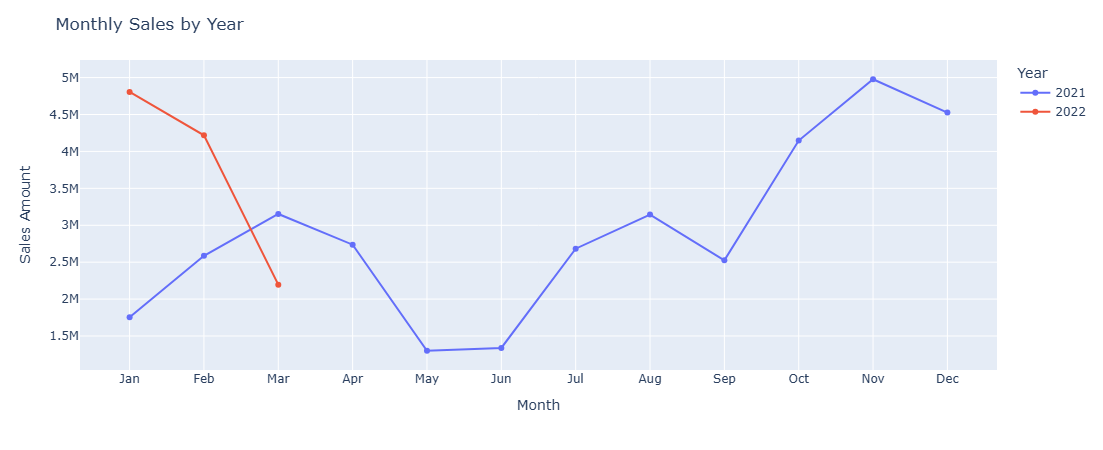

In [308]:
# Define the correct order of months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

#Set 'Month' as a categorical column with the correct order
monthly_sales["Month"] = pd.Categorical(monthly_sales["Month"], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(["Year", "Month"])
fig=px.line(
    monthly_sales,
    x="Month",
    y="Sales_Amount",
    markers=True,
    color="Year"
    
)

fig.update_layout(
    width=600,
    height=450,
    title="Monthly Sales by Year",
    xaxis_title="Month",
    yaxis_title="Sales Amount"
)

fig.show()

**WEEKLY SALES**


In [64]:
weekly_sales=df.groupby(["Year","Week"])["Sales_Amount"].sum().reset_index().head(20).sort_values(["Year","Week"])
weekly_sales

,Year,Week,Sales_Amount
0,2021,Wk1,163415.0
1,2021,Wk10,502887.0
2,2021,Wk11,768663.0
3,2021,Wk12,862771.0
4,2021,Wk13,618093.0
5,2021,Wk14,631036.0
6,2021,Wk15,605829.0
7,2021,Wk16,679812.0
8,2021,Wk17,600880.0
9,2021,Wk18,619248.0


**SALES PER COUNTRY**

Australia is leading with 7,895,097 followed by New Zealand then Canada while UK is the least.

In [67]:
total_countries=df["Country"].nunique()
print("Total countries:",total_countries)

country_names=df["Country"].unique()
print("Countries:",country_names)

sales_country=df.groupby("Country")["Sales_Amount"].sum().sort_values(ascending=False)
print(sales_country)

Total countries: 6
Countries: ['UK' 'India' 'Canada' 'USA' 'New Zealand' 'Australia']
Country
Australia      7895097.0
New Zealand    7815955.0
Canada         7761551.0
USA            7618989.0
India          7507710.0
UK             7487585.0
Name: Sales_Amount, dtype: float64


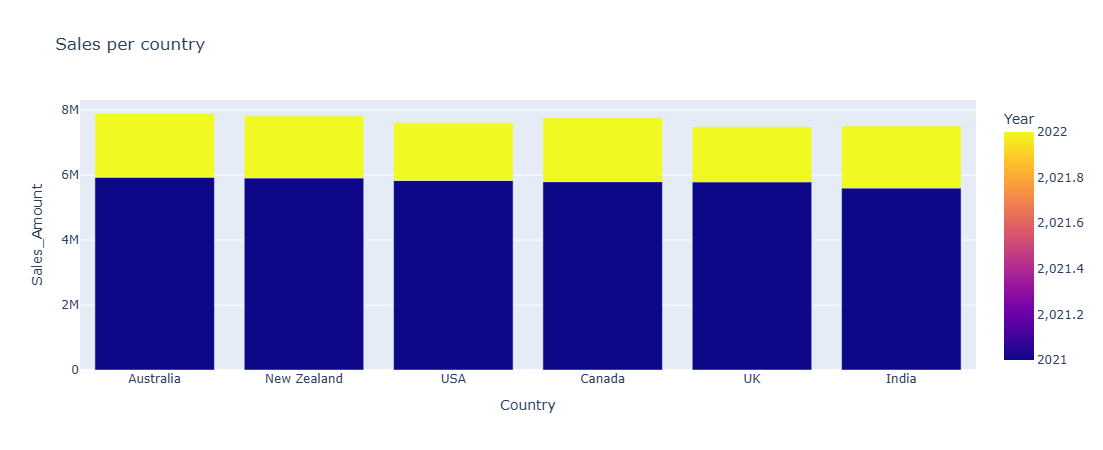

In [314]:
fig = px.bar(
    sales_country,
    x="Country",
    y="Sales_Amount",
    color="Year",
    barmode="group",
    title="Sales per country"
)
fig.update_layout(
    width=700, 
    height=450,
    xaxis_title="Country",
    yaxis_title="Sales_Amount"
    
)
fig.show()

In 2021, Australia is leading followed by New Zealand but India is the least.

In 2022,Canada is leading followed by Australia as UK becomes the least.

In [71]:
sales_country=df.groupby(["Year","Country"])["Sales_Amount"].sum().sort_values(ascending=False).reset_index()
sales_country

,Year,Country,Sales_Amount
0,2021,Australia,5935643.0
1,2021,New Zealand,5911283.0
2,2021,USA,5832176.0
3,2021,Canada,5798030.0
4,2021,UK,5790743.0
5,2021,India,5600217.0
6,2022,Canada,1963521.0
7,2022,Australia,1959454.0
8,2022,India,1907493.0
9,2022,New Zealand,1904672.0


**SALES PER REGION**

From my research, Sydney is a city in Australia which is in APAC region, so I'll replace Sydney with APAC.

Toronto is also a city in Canada which is in Americas, so I'll replace Toronto with Americas.


APAC region is leading with 23,218,762. It's countries include Australia ,India and New Zealand.

Americas is the second one with 15,380,540. It's countries include Canada and USA.

Europe is the least with 7,487,585. It only has UK.

In [252]:
county_region=df.groupby("Country")["Region"].unique()
print(county_region)
print()

new_regions=df["Region"].replace({'Sydney':'APAC','Toronto':'Americas'})
new_regions=df.groupby("Country")["Region"].unique()
print(new_regions)

Country
Australia          [APAC]
Canada         [Americas]
India              [APAC]
New Zealand        [APAC]
UK               [Europe]
USA            [Americas]
Name: Region, dtype: object

Country
Australia          [APAC]
Canada         [Americas]
India              [APAC]
New Zealand        [APAC]
UK               [Europe]
USA            [Americas]
Name: Region, dtype: object


In [76]:
new_regions=df["Region"].nunique()
print("New No. of regions:",new_regions)
print()

new_regions=df["Region"].unique()
print("New list of regions:",new_regions)
print()

new_regions=df.groupby("Country")["Region"].unique()
print(new_regions)
print()

region_sales=df.groupby("Region")["Sales_Amount"].sum()
print(region_sales)



New No. of regions: 3

New list of regions: ['Europe' 'APAC' 'Americas']

Country
Australia          [APAC]
Canada         [Americas]
India              [APAC]
New Zealand        [APAC]
UK               [Europe]
USA            [Americas]
Name: Region, dtype: object

Region
APAC        23218762.0
Americas    15380540.0
Europe       7487585.0
Name: Sales_Amount, dtype: float64


**SALES PER TEAM**

In each region, the teams' ranking is Julies,Delish,Yummies then Tempo in that order.

Julies has 7 sales people, Delish has 7,Yummies has 6 and Tempo has 5. This explains the ranking of their performance. But why is Julish higher than Delish yet they have same number of sales people?

In each country the perforance of each team is in this order; Julies,Delish,Yummies then Tempo except New Zealand where Delish is higher than Julies. Yet to find out why.

In 2021, in all the countries this is the order of performance Julies,Delish,Yummies then Tempo.

In 2022 there's a difference in trend.

In [79]:
team_no=df["Team"].nunique()
print("Total teams:",team_no)
print()

team_names=df["Team"].unique()
print("Teams:",team_names)
print()

team_performance=df.groupby("Team")["Sales_Amount"].sum()
print(team_performance)
print()

region_team=df.groupby(["Region","Team"])["Sales_Amount"].sum()
print(region_team)
print()

country_team=df.groupby(["Country","Team"])["Sales_Amount"].sum()
print(country_team)
print()

year_country_team=df.groupby(["Year","Country","Team"])["Sales_Amount"].sum()
print(year_country_team)
print()

year_month_country_team=df.groupby(["Year","Month","Country","Team"])["Sales_Amount"].sum().reset_index()
print(year_month_country_team)
print()






Total teams: 4

Teams: ['Yummies' 'Jucies' 'Delish' 'Tempo']

Team
Delish     13759137.0
Jucies     14313152.0
Tempo       5755372.0
Yummies    12259226.0
Name: Sales_Amount, dtype: float64

Region    Team   
APAC      Delish     6995359.0
          Jucies     7141848.0
          Tempo      2840138.0
          Yummies    6241417.0
Americas  Delish     4630227.0
          Jucies     4907637.0
          Tempo      1909250.0
          Yummies    3933426.0
Europe    Delish     2133551.0
          Jucies     2263667.0
          Tempo      1005984.0
          Yummies    2084383.0
Name: Sales_Amount, dtype: float64

Country      Team   
Australia    Delish     2457784.0
             Jucies     2497194.0
             Tempo       870807.0
             Yummies    2069312.0
Canada       Delish     2265032.0
             Jucies     2400272.0
             Tempo      1064588.0
             Yummies    2031659.0
India        Delish     2206708.0
             Jucies     2373371.0
             Tempo    

**SALES PER SALES PERSON**

There are 25 people in total, each person is a sales person in each region.

In [82]:
no_people=df["Sales Person"].nunique()
print("Total sales people:",no_people)
print()

people_names=df["Sales Person"].unique()
print("Total sales people:",people_names)
print()

region_person=df.groupby(["Region","Sales Person"])["Sales_Amount"].sum().reset_index()
print(region_person)
print()

country_person=df.groupby(["Country","Sales Person"])["Sales_Amount"].sum().reset_index()
print(country_person.head(26))
print()



Total sales people: 25

Total sales people: ['Dennison Crosswaite' 'Kelci Walkden' 'Gigi Bohling' 'Madelene Upcott'
 'Oby Sorrel' 'Brien Boise' 'Jan Morforth' "Marney O'Breen"
 'Andria Kimpton' 'Barr Faughny' 'Husein Augar' 'Ches Bonnell'
 'Dotty Strutley' 'Curtice Advani' 'Rafaelita Blaksland' 'Kaine Padly'
 'Beverie Moffet' 'Karlen McCaffrey' "Wilone O'Kielt" 'Gunar Cockshoot'
 'Van Tuxwell' 'Camilla Castle' 'Mallorie Waber' 'Jehu Rudeforth'
 'Roddy Speechley']

    Region         Sales Person  Sales_Amount
0     APAC       Andria Kimpton     1043434.0
1     APAC         Barr Faughny     1006838.0
2     APAC       Beverie Moffet     1073695.0
3     APAC          Brien Boise      964355.0
4     APAC       Camilla Castle      588714.0
..     ...                  ...           ...
70  Europe           Oby Sorrel      310443.0
71  Europe  Rafaelita Blaksland      338114.0
72  Europe      Roddy Speechley      228648.0
73  Europe          Van Tuxwell      124607.0
74  Europe       Wilone O

In [84]:
sales_person=df.groupby(["Team","Sales Person"])["Sales_Amount"].sum().reset_index()
print(sales_person)
print()
ranked_sales = df.sort_values(by='Sales_Amount', ascending=False)
top_columns = ranked_sales[['Team', 'Sales Person', 'Sales_Amount']]
print(top_columns)



print()



       Team         Sales Person  Sales_Amount
0    Delish       Andria Kimpton     2053443.0
1    Delish          Brien Boise     2002231.0
2    Delish         Ches Bonnell     1980846.0
3    Delish       Curtice Advani     1865157.0
4    Delish         Husein Augar     2024743.0
5    Delish          Kaine Padly     1915865.0
6    Delish     Karlen McCaffrey     1916852.0
7    Jucies       Beverie Moffet     2109618.0
8    Jucies       Dotty Strutley     2096857.0
9    Jucies        Kelci Walkden     2005010.0
10   Jucies      Madelene Upcott     2116569.0
11   Jucies       Marney O'Breen     2058392.0
12   Jucies           Oby Sorrel     1912491.0
13   Jucies  Rafaelita Blaksland     2014215.0
14    Tempo       Camilla Castle     1138851.0
15    Tempo       Jehu Rudeforth     1311772.0
16    Tempo       Mallorie Waber     1080562.0
17    Tempo      Roddy Speechley     1148987.0
18    Tempo          Van Tuxwell     1075200.0
19  Yummies         Barr Faughny     1896839.0
20  Yummies  

**SALES PER CATEGORY**

Bars are leading with 23,199,771 followed by Bites with  14,638,925 then other with 8,248,191.

In each region bars are leading followed by bites then other.

In each country we have the same trend.

It now makes sense, bars category has many products (11 products) thus a higher sales, bites has 7 products while others has few products(4 products) thus a low sales. If it had much products then sales would rise.

In [87]:
category_num=df["Category"].nunique()
print("Total categories:",category_num)
print()

categories=df["Category"].unique()
print("Categories:",categories)
print()

categories_sales=df.groupby("Category")["Sales_Amount"].sum()
print(categories_sales)
print()

region_categories_sales=df.groupby(["Region","Category"])["Sales_Amount"].sum()
print(region_categories_sales)
print()

country_categories_sales=df.groupby(["Country","Category"])["Sales_Amount"].sum()
print(country_categories_sales)
print()

category_product=df.groupby(["Category","Product Type"])["Sales_Amount"].sum()
category_product

Total categories: 3

Categories: ['Bars' 'Bites' 'Other']

Category
Bars     23199771.0
Bites    14638925.0
Other     8248191.0
Name: Sales_Amount, dtype: float64

Region    Category
APAC      Bars        11586722.0
          Bites        7431312.0
          Other        4200728.0
Americas  Bars         7807926.0
          Bites        4865595.0
          Other        2707019.0
Europe    Bars         3805123.0
          Bites        2342018.0
          Other        1340444.0
Name: Sales_Amount, dtype: float64

Country      Category
Australia    Bars        4062807.0
             Bites       2478252.0
             Other       1354038.0
Canada       Bars        3909493.0
             Bites       2404185.0
             Other       1447873.0
India        Bars        3771656.0
             Bites       2413033.0
             Other       1323021.0
New Zealand  Bars        3752259.0
             Bites       2540027.0
             Other       1523669.0
UK           Bars        3805123.0
       

Category  Product Type        
Bars      85% Dark Bars           2128140.0
          99% Dark & Pure         2145192.0
          Almond Choco            2021208.0
          Baker's Choco Chips     1918392.0
          Caramel Stuffed Bars    2142966.0
          Fruit & Nut Bars        2064153.0
          Milk Bars               2160984.0
          Mint Chip Choco         2024071.0
          Orange Choco            2162601.0
          Raspberry Choco         2117052.0
          Smooth Sliky Salty      2315012.0
Bites     50% Dark Bites          1937565.0
          70% Dark Bites          2012682.0
          After Nines             2174172.0
          Choco Coated Almonds    2078027.0
          Eclairs                 2002931.0
          Peanut Butter Cubes     2265410.0
          Spicy Special Slims     2168138.0
Other     Drinking Coco           2047969.0
          Manuka Honey Choco      2027221.0
          Organic Choco Syrup     2127811.0
          White Choc              2045190.0
N

**SALES PER PRODUCT TYPE**

In [90]:
total_types=df["Product Type"].nunique()
print("Total product types:",total_types)
print()

product_types=df["Product Type"].unique()
print("Product types:",product_types)
print()

product_sales=df.groupby(["Category","Product Type"])["Sales_Amount"].sum()
print(product_sales)

Total product types: 22

Product types: ['Almond Choco' 'Caramel Stuffed Bars' 'Eclairs' 'Manuka Honey Choco'
 'After Nines' 'Spicy Special Slims' '85% Dark Bars' 'White Choc'
 'Smooth Sliky Salty' 'Orange Choco' 'Mint Chip Choco'
 'Peanut Butter Cubes' '70% Dark Bites' 'Drinking Coco' 'Fruit & Nut Bars'
 'Raspberry Choco' 'Organic Choco Syrup' '99% Dark & Pure' 'Milk Bars'
 '50% Dark Bites' "Baker's Choco Chips" 'Choco Coated Almonds']

Category  Product Type        
Bars      85% Dark Bars           2128140.0
          99% Dark & Pure         2145192.0
          Almond Choco            2021208.0
          Baker's Choco Chips     1918392.0
          Caramel Stuffed Bars    2142966.0
          Fruit & Nut Bars        2064153.0
          Milk Bars               2160984.0
          Mint Chip Choco         2024071.0
          Orange Choco            2162601.0
          Raspberry Choco         2117052.0
          Smooth Sliky Salty      2315012.0
Bites     50% Dark Bites          1937565.0

Who's the best selling sales person?

How does the performance compare in various months?

what's the performance of products in various places at various times?

In [93]:
sales_person=df.groupby(["Sales Person"])["Sales_Amount"].sum().reset_index()
print(sales_person)
print()

           Sales Person  Sales_Amount
0        Andria Kimpton     2053443.0
1          Barr Faughny     1896839.0
2        Beverie Moffet     2109618.0
3           Brien Boise     2002231.0
4        Camilla Castle     1138851.0
5          Ches Bonnell     1980846.0
6        Curtice Advani     1865157.0
7   Dennison Crosswaite     1999151.0
8        Dotty Strutley     2096857.0
9          Gigi Bohling     1983968.0
10      Gunar Cockshoot     2195032.0
11         Husein Augar     2024743.0
12         Jan Morforth     2118543.0
13       Jehu Rudeforth     1311772.0
14          Kaine Padly     1915865.0
15     Karlen McCaffrey     1916852.0
16        Kelci Walkden     2005010.0
17      Madelene Upcott     2116569.0
18       Mallorie Waber     1080562.0
19       Marney O'Breen     2058392.0
20           Oby Sorrel     1912491.0
21  Rafaelita Blaksland     2014215.0
22      Roddy Speechley     1148987.0
23          Van Tuxwell     1075200.0
24       Wilone O'Kielt     2065693.0

